In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics 
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel("bank.xlsx")

In [3]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [4]:
df.select_dtypes(object)

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
0,admin.,married,secondary,no,yes,no,unknown,may,unknown,yes
1,admin.,married,secondary,no,no,no,unknown,may,unknown,yes
2,technician,married,secondary,no,yes,no,unknown,may,unknown,yes
3,services,married,secondary,no,yes,no,unknown,may,unknown,yes
4,admin.,married,tertiary,no,no,no,unknown,may,unknown,yes
...,...,...,...,...,...,...,...,...,...,...
11157,blue-collar,single,primary,no,yes,no,cellular,apr,unknown,no
11158,services,married,secondary,no,no,no,unknown,jun,unknown,no
11159,technician,single,secondary,no,no,no,cellular,aug,unknown,no
11160,technician,married,secondary,no,no,yes,cellular,may,failure,no


In [5]:
df["default"] = np.where(df["default"]=="yes",1,0)
df["deposit"] =  np.where(df["deposit"]=="yes",1,0)
df["loan"] =  np.where(df["loan"]=="yes",1,0)
df["housing"] =  np.where(df["housing"]=="yes",1,0)

In [6]:
df.select_dtypes(object).columns

Index(['job', 'marital', 'education', 'contact', 'month', 'poutcome'], dtype='object')

In [7]:
# column = column.replace([old_Value],new_value)
df["poutcome"] = df["poutcome"].replace(["other"],"unknown")

In [8]:
df["poutcome"].value_counts()

poutcome
unknown    8863
failure    1228
success    1071
Name: count, dtype: int64

In [9]:
df["job"].value_counts()

job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64

In [10]:
df["job"] = df["job"].replace(["management","entrepreneur","admin."],"white-collar")

In [11]:
df["job"] = df["job"].replace(["technician","services"],"blue-collar")

In [12]:
df["job"] = df["job"].replace(["retired","self-employed","housemaid"],"self-depend")

In [13]:
df["job"] = df["job"].replace(["student"],"unemployed")

In [14]:
df["job"].value_counts()

job
blue-collar     4690
white-collar    4228
self-depend     1457
unemployed       717
unknown           70
Name: count, dtype: int64

In [15]:
df["loan"].value_counts()

loan
0    9702
1    1460
Name: count, dtype: int64

In [16]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,white-collar,married,secondary,0,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,1
1,56,white-collar,married,secondary,0,45,0,0,unknown,5,may,1467,1,-1,0,unknown,1
2,41,blue-collar,married,secondary,0,1270,1,0,unknown,5,may,1389,1,-1,0,unknown,1
3,55,blue-collar,married,secondary,0,2476,1,0,unknown,5,may,579,1,-1,0,unknown,1
4,54,white-collar,married,tertiary,0,184,0,0,unknown,5,may,673,2,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,0,1,1,0,cellular,20,apr,257,1,-1,0,unknown,0
11158,39,blue-collar,married,secondary,0,733,0,0,unknown,16,jun,83,4,-1,0,unknown,0
11159,32,blue-collar,single,secondary,0,29,0,0,cellular,19,aug,156,2,-1,0,unknown,0
11160,43,blue-collar,married,secondary,0,0,0,1,cellular,8,may,9,2,172,5,failure,0


In [17]:
df.drop(columns="month",inplace = True)

In [18]:
df.select_dtypes([int,float])

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,deposit
0,59,0,2343,1,0,5,1042,1,-1,0,1
1,56,0,45,0,0,5,1467,1,-1,0,1
2,41,0,1270,1,0,5,1389,1,-1,0,1
3,55,0,2476,1,0,5,579,1,-1,0,1
4,54,0,184,0,0,5,673,2,-1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
11157,33,0,1,1,0,20,257,1,-1,0,0
11158,39,0,733,0,0,16,83,4,-1,0,0
11159,32,0,29,0,0,19,156,2,-1,0,0
11160,43,0,0,0,1,8,9,2,172,5,0


In [19]:
# age --> top
# balance --> top and bottom
# pdays --> top
# duration ---> top

In [20]:
df["pdays"] = np.where(df["pdays"]== -1,1,df["pdays"])

In [21]:
def IQR(x):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1 
    lf = q1 - (1.5*iqr)
    uf = q3 + (1.5*iqr)
    print("LF",lf)
    print("UF",uf)

In [22]:
IQR(df["previous"])

LF -1.5
UF 2.5


In [23]:
df["age"] = np.where(df["age"]>74,74,df["age"])
df["balance"] = np.where(df["balance"]>4087,4087,df["balance"])
df["balance"] = np.where(df["balance"]<-2257,-2257,df["balance"])
df["pdays"] = np.where(df["pdays"]>50,50,df["pdays"])
df["duration"] = np.where(df["duration"]>1033,1033,df["duration"])
df["campaign"] = np.where(df["campaign"]>6,6,df["campaign"])
df["previous"] = np.where(df["previous"]>2,2,df["previous"])

In [24]:
df.select_dtypes(object).columns

Index(['job', 'marital', 'education', 'contact', 'poutcome'], dtype='object')

In [25]:
bank = pd.get_dummies(df,columns=['job', 'marital', 'education', 'contact', 'poutcome'],
                drop_first=True)

In [26]:
X = bank.drop(columns="deposit")
y = bank["deposit"]

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=55)

# Logistic regression

In [28]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,y_train)
print("Train accuracy",log.score(X_train,y_train))
print("Test Accuracy",log.score(X_test,y_test))

Train accuracy 0.8008735580692127
Test Accuracy 0.7881773399014779


# Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=5)
dt.fit(X_train,y_train)
print("Train accuracy",dt.score(X_train,y_train))
print("Test Accuracy",dt.score(X_test,y_test))

Train accuracy 1.0
Test Accuracy 0.7375727720555306


In [30]:
dt = DecisionTreeClassifier(criterion="entropy",
                            max_depth=10,min_samples_split=200,
                            min_samples_leaf=6,random_state=5)
dt.fit(X_train,y_train)
print("Train accuracy",dt.score(X_train,y_train))
print("Test Accuracy",dt.score(X_test,y_test))

Train accuracy 0.823944450666368
Test Accuracy 0.8083296014330497


In [31]:
# overfit:- if the accuracuy of the train data is more than test data
# underfit :- when the accuracy of test data is more than training data
# treatment of overfit and underfit problem
# hyper-parameter tuning

DecisionTreeClassifier(*, criterion='gini', 
 max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=None)
 

In [32]:
criterion = ["gini","entropy"]
max_dept = [4,6,8,10,12,14]
min_sam_sp = [3,4,5,6,7,8,9,10]
for c in criterion:
    for d in max_dept:
        for s in min_sam_sp:
            dt = DecisionTreeClassifier(criterion=c,
                                       max_depth=d,
                                       min_samples_split=s, min_samples_leaf=2,
                                       random_state=55)
            dt.fit(X_train,y_train)
            print("criteion-> {} max_dept-> {} min_sample_sp-> {}".format(c,d,s))
            print("Train accuracy",dt.score(X_train,y_train))
            print("Test accuracy",dt.score(X_test,y_test))
            print("======================================")

criteion-> gini max_dept-> 4 min_sample_sp-> 3
Train accuracy 0.7757867622354127
Test accuracy 0.7671294223018361
criteion-> gini max_dept-> 4 min_sample_sp-> 4
Train accuracy 0.7757867622354127
Test accuracy 0.7671294223018361
criteion-> gini max_dept-> 4 min_sample_sp-> 5
Train accuracy 0.7757867622354127
Test accuracy 0.7671294223018361
criteion-> gini max_dept-> 4 min_sample_sp-> 6
Train accuracy 0.7757867622354127
Test accuracy 0.7671294223018361
criteion-> gini max_dept-> 4 min_sample_sp-> 7
Train accuracy 0.7757867622354127
Test accuracy 0.7671294223018361
criteion-> gini max_dept-> 4 min_sample_sp-> 8
Train accuracy 0.7757867622354127
Test accuracy 0.7671294223018361
criteion-> gini max_dept-> 4 min_sample_sp-> 9
Train accuracy 0.7757867622354127
Test accuracy 0.7671294223018361
criteion-> gini max_dept-> 4 min_sample_sp-> 10
Train accuracy 0.7757867622354127
Test accuracy 0.7671294223018361
criteion-> gini max_dept-> 6 min_sample_sp-> 3
Train accuracy 0.8140889237316609
Test a

criteion-> entropy max_dept-> 4 min_sample_sp-> 10
Train accuracy 0.7764587299809609
Test accuracy 0.767577250335871
criteion-> entropy max_dept-> 6 min_sample_sp-> 3
Train accuracy 0.8117370366222422
Test accuracy 0.7922077922077922
criteion-> entropy max_dept-> 6 min_sample_sp-> 4
Train accuracy 0.8117370366222422
Test accuracy 0.7922077922077922
criteion-> entropy max_dept-> 6 min_sample_sp-> 5
Train accuracy 0.8117370366222422
Test accuracy 0.7922077922077922
criteion-> entropy max_dept-> 6 min_sample_sp-> 6
Train accuracy 0.8117370366222422
Test accuracy 0.7922077922077922
criteion-> entropy max_dept-> 6 min_sample_sp-> 7
Train accuracy 0.8116250419979841
Test accuracy 0.7922077922077922
criteion-> entropy max_dept-> 6 min_sample_sp-> 8
Train accuracy 0.8116250419979841
Test accuracy 0.7922077922077922
criteion-> entropy max_dept-> 6 min_sample_sp-> 9
Train accuracy 0.8116250419979841
Test accuracy 0.7922077922077922
criteion-> entropy max_dept-> 6 min_sample_sp-> 10
Train accurac

In [33]:
dt = DecisionTreeClassifier(criterion="entropy",
                           max_depth=10,
                           min_samples_split=10,
                           min_samples_leaf=1,
                           random_state=55)
dt.fit(X_train,y_train)
print("train",dt.score(X_train,y_train))
print("test",dt.score(X_test,y_test))

train 0.8499272034942322
test 0.7975817286162113


In [34]:
from sklearn.tree import plot_tree

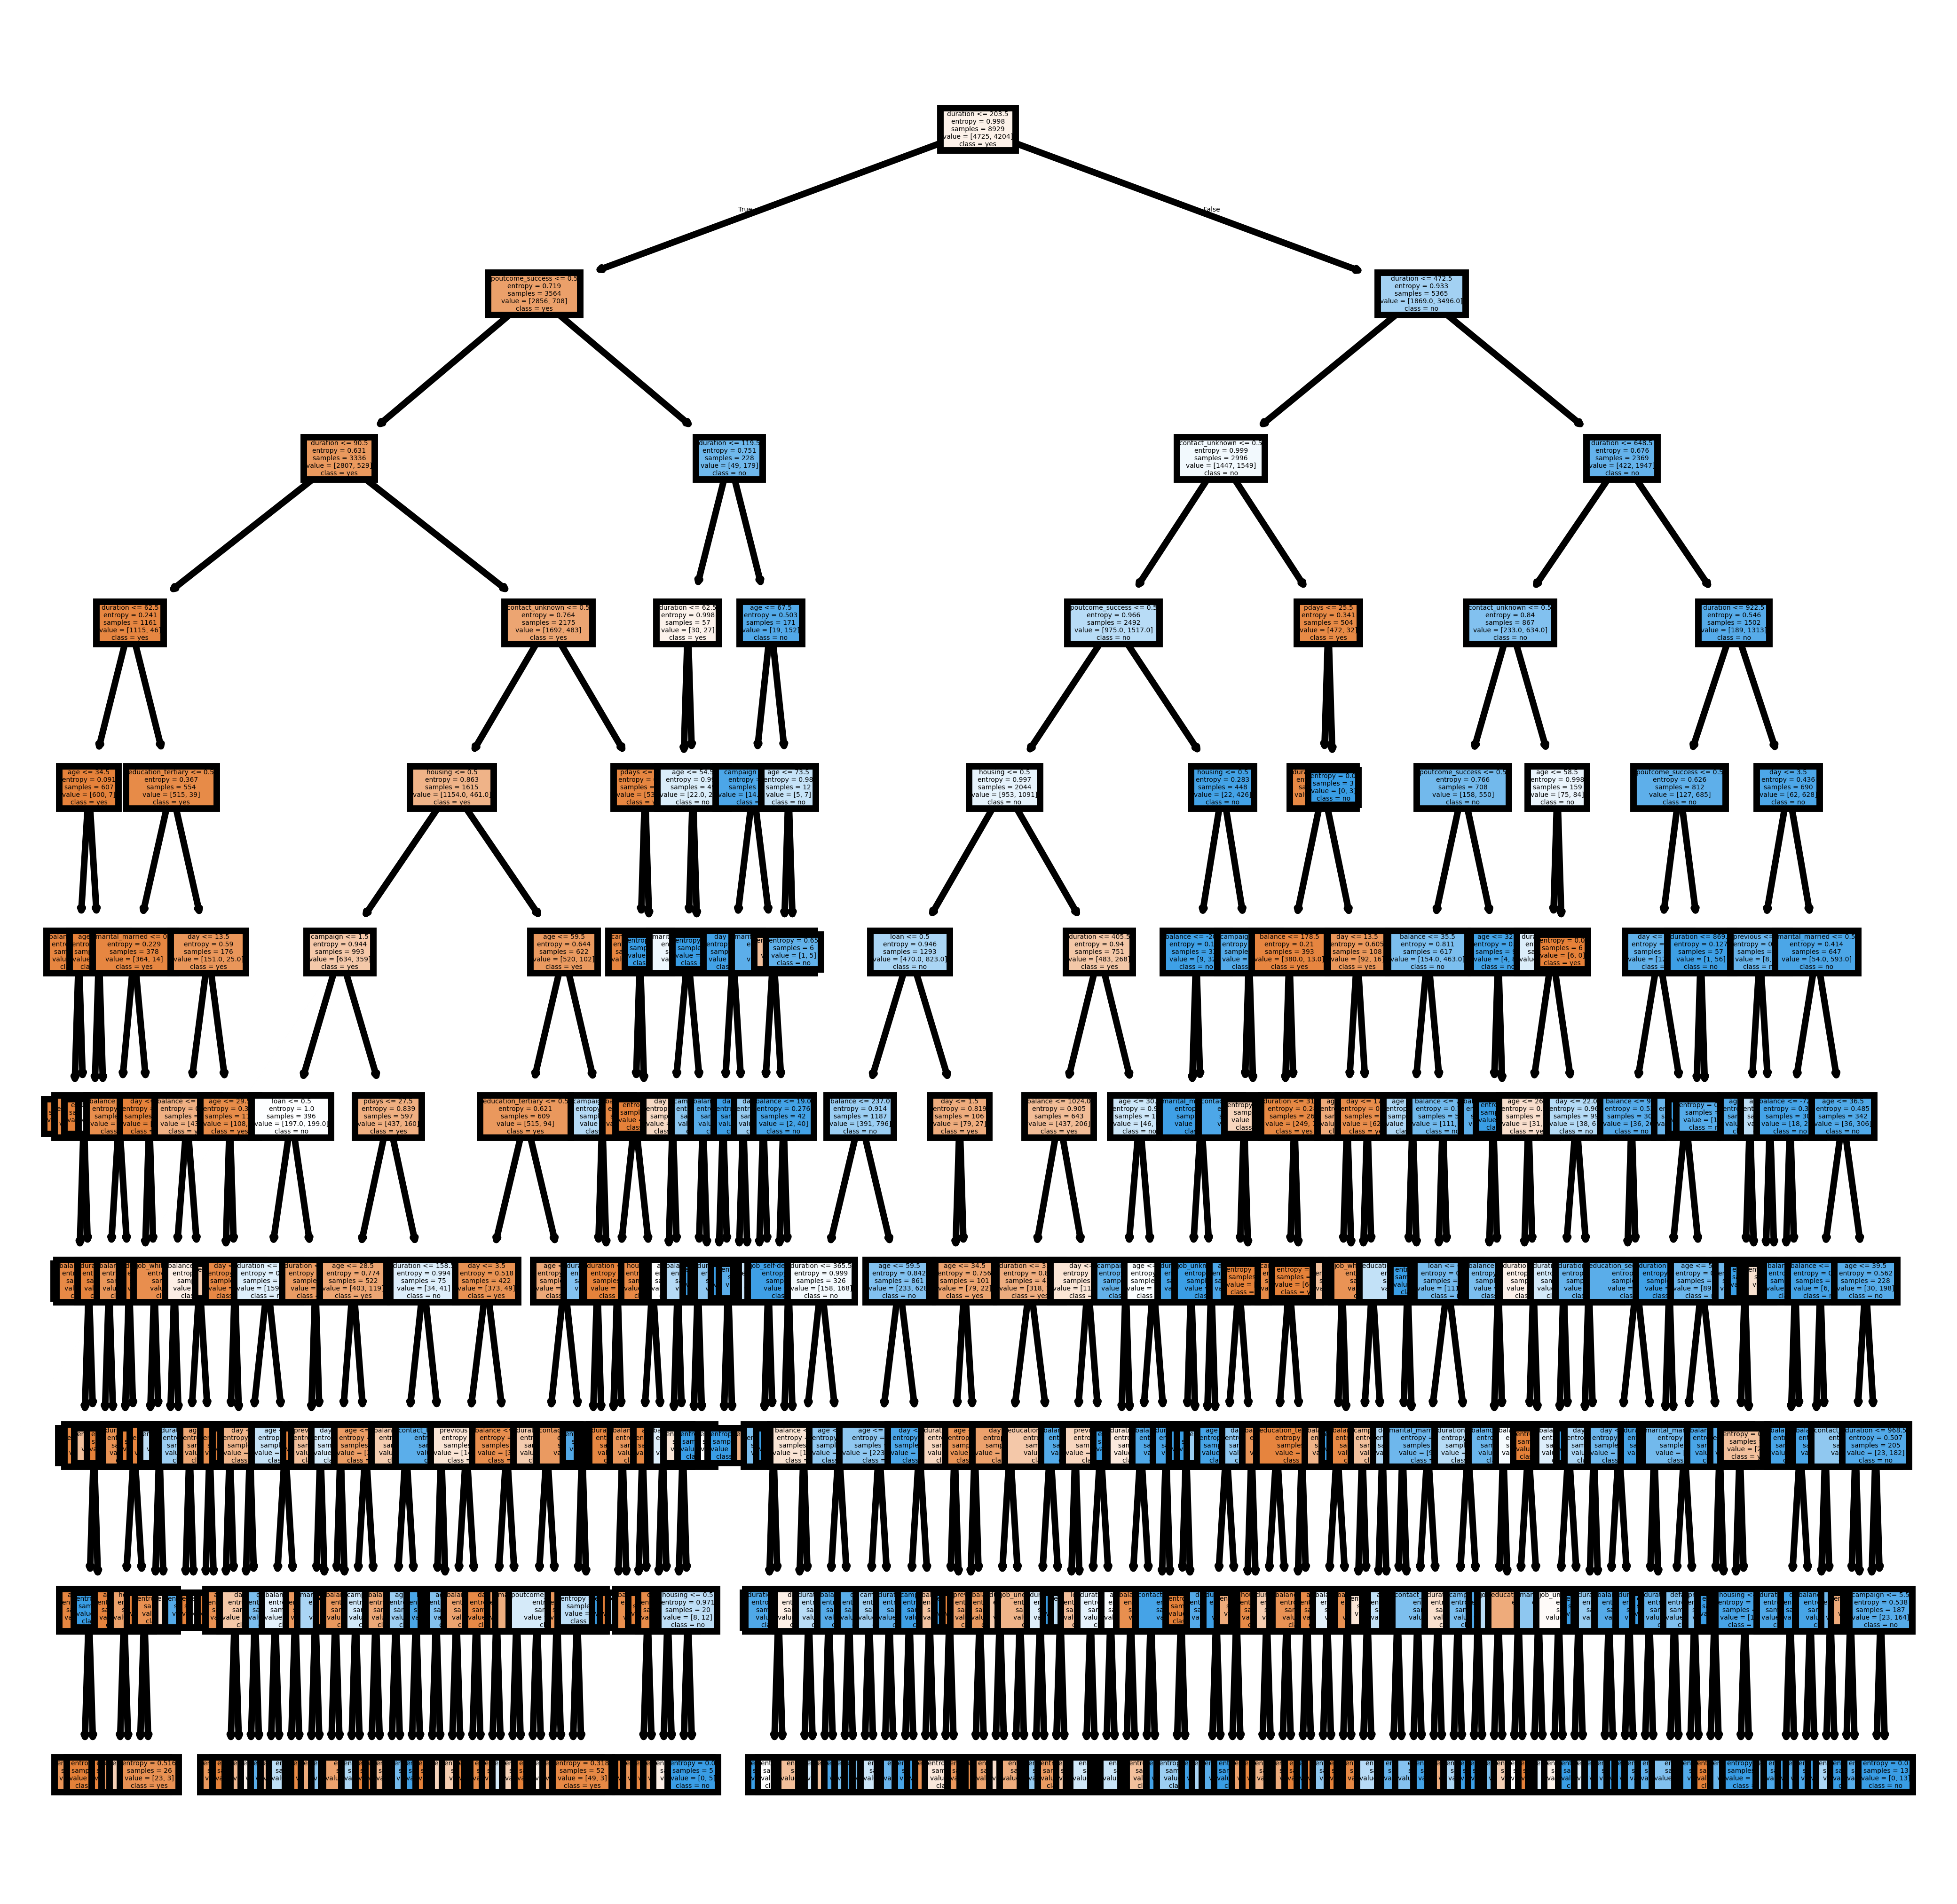

In [35]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=1000)
plot_tree(dt,feature_names=X_train.columns,class_names=["yes","no"],
         filled=True)
plt.show()

In [36]:
from sklearn import tree

In [37]:
rules = tree.export_text(dt,feature_names=X_train.columns,class_names=["yes","no"])

In [38]:
print(rules)

|--- duration <= 203.50
|   |--- poutcome_success <= 0.50
|   |   |--- duration <= 90.50
|   |   |   |--- duration <= 62.50
|   |   |   |   |--- age <= 34.50
|   |   |   |   |   |--- balance <= 297.00
|   |   |   |   |   |   |--- class: yes
|   |   |   |   |   |--- balance >  297.00
|   |   |   |   |   |   |--- age <= 23.50
|   |   |   |   |   |   |   |--- class: no
|   |   |   |   |   |   |--- age >  23.50
|   |   |   |   |   |   |   |--- balance <= 302.50
|   |   |   |   |   |   |   |   |--- class: no
|   |   |   |   |   |   |   |--- balance >  302.50
|   |   |   |   |   |   |   |   |--- day <= 30.00
|   |   |   |   |   |   |   |   |   |--- age <= 29.50
|   |   |   |   |   |   |   |   |   |   |--- class: yes
|   |   |   |   |   |   |   |   |   |--- age >  29.50
|   |   |   |   |   |   |   |   |   |   |--- class: yes
|   |   |   |   |   |   |   |   |--- day >  30.00
|   |   |   |   |   |   |   |   |   |--- class: no
|   |   |   |   |--- age >  34.50
|   |   |   |   |   |--- age <= 71.

### Grid Search :- it is use for hyper-parameter-tuning where it reutrn the best fit results 

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
dt

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=10,
                       random_state=55)

In [41]:
para = {"criterion":["gini","entropy"],
       "max_depth":[2,4,6,8,10,12,14,16,18,20],
       "min_samples_split":[10,20,30,40,50,60,70,80,90,100],
       "min_samples_leaf":[1,2,3]}
tre = DecisionTreeClassifier(random_state=55)

grid = GridSearchCV(tre , param_grid=para,cv=5,verbose=1,n_jobs=-1)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 600 candidates, totalling 3000 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=55), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [10, 20, 30, 40, 50, 60, 70, 80,
                                               90, 100]},
             verbose=1)

In [42]:
dt = DecisionTreeClassifier(max_depth=10, min_samples_leaf=3, min_samples_split=100,
                       random_state=55)
dt.fit(X_train,y_train)
print("train",dt.score(X_train,y_train))
print("test",dt.score(X_test,y_test))

train 0.8290962033822377
test 0.7917599641737573


In [44]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
rf = RandomForestClassifier(random_state=77)

In [48]:
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=77)

In [50]:
print("Train Accurcay",rf.score(X_train,y_train))
print("Test Accurcay",rf.score(X_test,y_test))

Train Accurcay 1.0
Test Accurcay 0.8119122257053292


In [54]:
rf1 = RandomForestClassifier(n_estimators=200,random_state=88)

In [55]:
rf1.fit(X_train,y_train)
print("Train Accurcay",rf1.score(X_train,y_train))
print("Test Accurcay",rf1.score(X_test,y_test))

Train Accurcay 1.0
Test Accurcay 0.8190774742498881


In [56]:
model = [150,200,250,300,350]
cri = ["gini","entropy"]
md = [70,80,90,100]
ms = [70,80,90,100]
for m in model:
    for c in cri:
        for d in md:
            for s in ms:
                rf = RandomForestClassifier(n_estimators=m,
                                      criterion=c,
                                      max_depth=d,min_samples_split=s,
                                      random_state=88)
                rf.fit(X_train,y_train)
                print("model-> {} , cri-> {} , max_d-> {} min_sam -> {} ".format(m,c,d,s))
                print("Train Accuracy",rf.score(X_train,y_train))
                print("Test Accuracy",rf.score(X_test,y_test))
                print("***************************************")

model-> 100 , cri-> gini , max_d-> 10 min_sam -> 40 
Train Accuracy 0.8492552357486841
Test Accuracy 0.8199731303179579
***************************************
model-> 100 , cri-> gini , max_d-> 10 min_sam -> 50 
Train Accuracy 0.8483592787546198
Test Accuracy 0.8132557098074339
***************************************
model-> 100 , cri-> gini , max_d-> 10 min_sam -> 60 
Train Accuracy 0.8447754507783627
Test Accuracy 0.8163905060456784
***************************************
model-> 100 , cri-> gini , max_d-> 10 min_sam -> 70 
Train Accuracy 0.8432075260387502
Test Accuracy 0.812360053739364
***************************************
model-> 100 , cri-> gini , max_d-> 10 min_sam -> 80 
Train Accuracy 0.8411916228021055
Test Accuracy 0.812360053739364
***************************************
model-> 100 , cri-> gini , max_d-> 10 min_sam -> 90 
Train Accuracy 0.8401836711837832
Test Accuracy 0.8150470219435737
***************************************
model-> 100 , cri-> gini , max_d-> 10 min_

Train Accuracy 0.8530630529734573
Test Accuracy 0.819525302283923
***************************************
model-> 100 , cri-> gini , max_d-> 80 min_sam -> 70 
Train Accuracy 0.8505991712397805
Test Accuracy 0.8163905060456784
***************************************
model-> 100 , cri-> gini , max_d-> 80 min_sam -> 80 
Train Accuracy 0.8498152088699742
Test Accuracy 0.8168383340797134
***************************************
model-> 100 , cri-> gini , max_d-> 80 min_sam -> 90 
Train Accuracy 0.846119386269459
Test Accuracy 0.819525302283923
***************************************
model-> 100 , cri-> gini , max_d-> 80 min_sam -> 100 
Train Accuracy 0.8449994400268787
Test Accuracy 0.819525302283923
***************************************
model-> 100 , cri-> gini , max_d-> 90 min_sam -> 40 
Train Accuracy 0.8640385261507447
Test Accuracy 0.8199731303179579
***************************************
model-> 100 , cri-> gini , max_d-> 90 min_sam -> 50 
Train Accuracy 0.8598947250531974
Test Accu

model-> 100 , cri-> entropy , max_d-> 50 min_sam -> 80 
Train Accuracy 0.8518311121066189
Test Accuracy 0.8168383340797134
***************************************
model-> 100 , cri-> entropy , max_d-> 50 min_sam -> 90 
Train Accuracy 0.8481352895061037
Test Accuracy 0.8186296462158531
***************************************
model-> 100 , cri-> entropy , max_d-> 50 min_sam -> 100 
Train Accuracy 0.8448874454026207
Test Accuracy 0.819525302283923
***************************************
model-> 100 , cri-> entropy , max_d-> 60 min_sam -> 40 
Train Accuracy 0.8645984992720349
Test Accuracy 0.8231079265562025
***************************************
model-> 100 , cri-> entropy , max_d-> 60 min_sam -> 50 
Train Accuracy 0.8595587411804233
Test Accuracy 0.8231079265562025
***************************************
model-> 100 , cri-> entropy , max_d-> 60 min_sam -> 60 
Train Accuracy 0.8561989024526823
Test Accuracy 0.8213166144200627
***************************************
model-> 100 , cri-> en

model-> 150 , cri-> gini , max_d-> 20 min_sam -> 100 
Train Accuracy 0.8442154776570725
Test Accuracy 0.8177339901477833
***************************************
model-> 150 , cri-> gini , max_d-> 30 min_sam -> 40 
Train Accuracy 0.864822488520551
Test Accuracy 0.8199731303179579
***************************************
model-> 150 , cri-> gini , max_d-> 30 min_sam -> 50 
Train Accuracy 0.858214805689327
Test Accuracy 0.8208687863860278
***************************************
model-> 150 , cri-> gini , max_d-> 30 min_sam -> 60 
Train Accuracy 0.8526150744764251
Test Accuracy 0.8168383340797134
***************************************
model-> 150 , cri-> gini , max_d-> 30 min_sam -> 70 
Train Accuracy 0.8513831336095867
Test Accuracy 0.8168383340797134
***************************************
model-> 150 , cri-> gini , max_d-> 30 min_sam -> 80 
Train Accuracy 0.8493672303729422
Test Accuracy 0.8181818181818182
***************************************
model-> 150 , cri-> gini , max_d-> 30 min

Train Accuracy 0.858214805689327
Test Accuracy 0.8208687863860278
***************************************
model-> 150 , cri-> gini , max_d-> 100 min_sam -> 60 
Train Accuracy 0.8526150744764251
Test Accuracy 0.8168383340797134
***************************************
model-> 150 , cri-> gini , max_d-> 100 min_sam -> 70 
Train Accuracy 0.8513831336095867
Test Accuracy 0.8168383340797134
***************************************
model-> 150 , cri-> gini , max_d-> 100 min_sam -> 80 
Train Accuracy 0.8493672303729422
Test Accuracy 0.8181818181818182
***************************************
model-> 150 , cri-> gini , max_d-> 100 min_sam -> 90 
Train Accuracy 0.846007391645201
Test Accuracy 0.8168383340797134
***************************************
model-> 150 , cri-> gini , max_d-> 100 min_sam -> 100 
Train Accuracy 0.8442154776570725
Test Accuracy 0.8177339901477833
***************************************
model-> 150 , cri-> entropy , max_d-> 10 min_sam -> 40 
Train Accuracy 0.8493672303729422

model-> 150 , cri-> entropy , max_d-> 70 min_sam -> 70 
Train Accuracy 0.8527270691006832
Test Accuracy 0.8231079265562025
***************************************
model-> 150 , cri-> entropy , max_d-> 70 min_sam -> 80 
Train Accuracy 0.8512711389853287
Test Accuracy 0.8217644424540976
***************************************
model-> 150 , cri-> entropy , max_d-> 70 min_sam -> 90 
Train Accuracy 0.8479113002575877
Test Accuracy 0.8199731303179579
***************************************
model-> 150 , cri-> entropy , max_d-> 70 min_sam -> 100 
Train Accuracy 0.8444394669055886
Test Accuracy 0.8199731303179579
***************************************
model-> 150 , cri-> entropy , max_d-> 80 min_sam -> 40 
Train Accuracy 0.8656064508903573
Test Accuracy 0.8213166144200627
***************************************
model-> 150 , cri-> entropy , max_d-> 80 min_sam -> 50 
Train Accuracy 0.8603427035502296
Test Accuracy 0.8231079265562025
***************************************
model-> 150 , cri-> e

model-> 200 , cri-> gini , max_d-> 40 min_sam -> 90 
Train Accuracy 0.8456714077724269
Test Accuracy 0.8177339901477833
***************************************
model-> 200 , cri-> gini , max_d-> 40 min_sam -> 100 
Train Accuracy 0.8444394669055886
Test Accuracy 0.8154948499776086
***************************************
model-> 200 , cri-> gini , max_d-> 50 min_sam -> 40 
Train Accuracy 0.8632545637809386
Test Accuracy 0.8213166144200627
***************************************
model-> 200 , cri-> gini , max_d-> 50 min_sam -> 50 
Train Accuracy 0.8588867734348751
Test Accuracy 0.8208687863860278
***************************************
model-> 200 , cri-> gini , max_d-> 50 min_sam -> 60 
Train Accuracy 0.8532870422219734
Test Accuracy 0.8190774742498881
***************************************
model-> 200 , cri-> gini , max_d-> 50 min_sam -> 70 
Train Accuracy 0.8511591443610707
Test Accuracy 0.8168383340797134
***************************************
model-> 200 , cri-> gini , max_d-> 50 m

model-> 200 , cri-> entropy , max_d-> 20 min_sam -> 40 
Train Accuracy 0.8644865046477769
Test Accuracy 0.8190774742498881
***************************************
model-> 200 , cri-> entropy , max_d-> 20 min_sam -> 50 
Train Accuracy 0.8588867734348751
Test Accuracy 0.8213166144200627
***************************************
model-> 200 , cri-> entropy , max_d-> 20 min_sam -> 60 
Train Accuracy 0.8545189830888117
Test Accuracy 0.8168383340797134
***************************************
model-> 200 , cri-> entropy , max_d-> 20 min_sam -> 70 
Train Accuracy 0.852279090603651
Test Accuracy 0.8204209583519928
***************************************
model-> 200 , cri-> entropy , max_d-> 20 min_sam -> 80 
Train Accuracy 0.8494792249972002
Test Accuracy 0.8208687863860278
***************************************
model-> 200 , cri-> entropy , max_d-> 20 min_sam -> 90 
Train Accuracy 0.8471273378877814
Test Accuracy 0.8190774742498881
***************************************
model-> 200 , cri-> ent

Train Accuracy 0.8591107626833911
Test Accuracy 0.8222122704881325
***************************************
model-> 200 , cri-> entropy , max_d-> 90 min_sam -> 60 
Train Accuracy 0.8547429723373278
Test Accuracy 0.8159426780116436
***************************************
model-> 200 , cri-> entropy , max_d-> 90 min_sam -> 70 
Train Accuracy 0.852279090603651
Test Accuracy 0.8217644424540976
***************************************
model-> 200 , cri-> entropy , max_d-> 90 min_sam -> 80 
Train Accuracy 0.8503751819912644
Test Accuracy 0.8222122704881325
***************************************
model-> 200 , cri-> entropy , max_d-> 90 min_sam -> 90 
Train Accuracy 0.8475753163848135
Test Accuracy 0.8186296462158531
***************************************
model-> 200 , cri-> entropy , max_d-> 90 min_sam -> 100 
Train Accuracy 0.8451114346511367
Test Accuracy 0.8172861621137483
***************************************
model-> 200 , cri-> entropy , max_d-> 100 min_sam -> 40 
Train Accuracy 0.8654

Train Accuracy 0.8504871766155224
Test Accuracy 0.8186296462158531
***************************************
model-> 250 , cri-> gini , max_d-> 60 min_sam -> 80 
Train Accuracy 0.8483592787546198
Test Accuracy 0.8190774742498881
***************************************
model-> 250 , cri-> gini , max_d-> 60 min_sam -> 90 
Train Accuracy 0.8455594131481688
Test Accuracy 0.8154948499776086
***************************************
model-> 250 , cri-> gini , max_d-> 60 min_sam -> 100 
Train Accuracy 0.8444394669055886
Test Accuracy 0.8154948499776086
***************************************
model-> 250 , cri-> gini , max_d-> 70 min_sam -> 40 
Train Accuracy 0.8640385261507447
Test Accuracy 0.8222122704881325
***************************************
model-> 250 , cri-> gini , max_d-> 70 min_sam -> 50 
Train Accuracy 0.8591107626833911
Test Accuracy 0.8213166144200627
***************************************
model-> 250 , cri-> gini , max_d-> 70 min_sam -> 60 
Train Accuracy 0.8536230260947475
Test 

KeyboardInterrupt: 